### Take a look at the data

In [1]:
path = '../other_dumps/comments'

In [2]:
import os

In [5]:
files = os.listdir(f'{path}/original_dumps')

In [6]:
import pandas as pd

In [8]:
# collect all dfs with comments into one (they start with AN)
areas = []

for i, file in enumerate(files):
    if 'AN' not in file:
        continue
    df = pd.read_csv(f'{path}/original_dumps/{file}')
    end_area = 9 + file[9:].index('-')
    area_name = file[8:end_area].lower()
    df['area'] = [area_name] * df.shape[0]
    areas.append(area_name)
    
    if i == 0:
        common_df = df
    else:
        common_df = pd.concat([common_df, df])

In [9]:
common_df.shape

(250770, 13)

In [10]:
common_df.head(5)

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area
0,1988,new,skip,Im not goot with chars,2019-04-01 11:27:56,https://hyperskill.org/learn/step/18814,choice,1,0,0,0,12,math
1,1989,new,skip,all answers are wrong,2019-04-01 11:32:55,https://hyperskill.org/learn/step/18816,choice,1,0,0,0,54,math
2,1990,new,skip,all answerd are wrong,2019-04-01 11:34:13,https://hyperskill.org/learn/step/18817,string,1,0,0,0,54,math
3,2018,new,skip,Error in checking,2019-04-01 15:33:40,https://hyperskill.org/learn/step/18915,number,1,0,0,0,53,math
4,2052,new,skip,import java.util.Scanner;\n\nclass Main {\n ...,2019-04-02 09:52:55,https://hyperskill.org/learn/step/19117,choice,1,0,0,0,46,math


In [11]:
import matplotlib.pyplot as plt

In [12]:
plt.rcParams["figure.figsize"] = (20, 3)

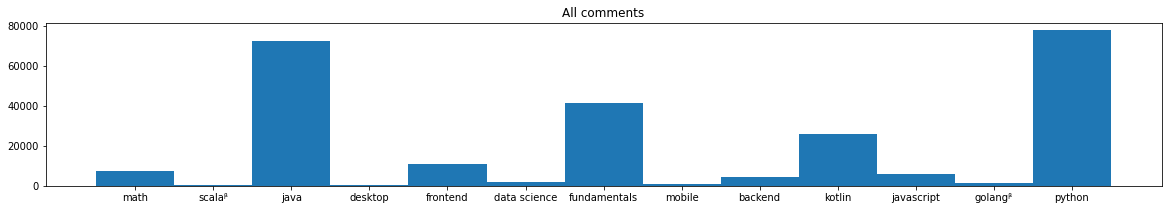

In [13]:
n, bins, patches = plt.hist(common_df.area.values, bins=len(areas))
ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
ticklabels = areas
plt.xticks(ticks, ticklabels)
plt.title('All comments')
plt.show()

In [14]:
all_comments = common_df.shape[0]

for area in areas:
    df_area = common_df[common_df.area == area]
    num_comments = df_area.shape[0]
    print(f'{area}: {num_comments} comments, {round(num_comments / all_comments, 2)}%')

math: 7554 comments, 0.03%
scalaᵝ: 177 comments, 0.0%
java: 72214 comments, 0.29%
desktop: 464 comments, 0.0%
frontend: 11013 comments, 0.04%
data science: 2048 comments, 0.01%
fundamentals: 41381 comments, 0.17%
mobile: 1031 comments, 0.0%
backend: 4296 comments, 0.02%
kotlin: 26064 comments, 0.1%
javascript: 5728 comments, 0.02%
golangᵝ: 1154 comments, 0.0%
python: 77646 comments, 0.31%


#### Now leave only comments to theories

In [15]:
common_df_theories = common_df[common_df.block_name == 'text']

In [16]:
common_df_theories.shape

(25311, 13)

In [17]:
common_df_theories.head(-5)

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area
28,9403,fixed,comment,"""...to divide between two your friends""\r\nI t...",2019-06-08 20:14:45,https://hyperskill.org/learn/step/5614,text,0,0,0,0,45,math
29,9408,won't fix,comment,"It was not completely clear for me, how to con...",2019-06-08 20:32:26,https://hyperskill.org/learn/step/5614,text,1,0,3,2,45,math
48,15054,fixed,feedback,completly not understood,2019-07-09 11:11:43,https://hyperskill.org/learn/step/5753,text,1,0,0,0,105,math
49,15115,fixed,feedback,A better explanation is needed with clear defi...,2019-07-09 17:34:21,https://hyperskill.org/learn/step/5753,text,1,0,0,0,109,math
52,15268,fixed,comment,>remember that 2^8 in decimal is 1000 0000 in ...,2019-07-10 16:03:41,https://hyperskill.org/learn/step/5753,text,0,0,1,0,122,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77479,1588623,new,feedback,repetitive to other stuff in the track,2022-05-27 06:55:37,https://hyperskill.org/learn/step/9468,text,1,0,0,0,16614,python
77482,1588755,new,feedback,Nothing is clear(,2022-05-27 08:42:54,https://hyperskill.org/learn/step/8061,text,1,0,0,0,17359,python
77494,1589607,new,feedback,This comment in section 4 code is not fully ac...,2022-05-27 17:05:22,https://hyperskill.org/learn/step/5920,text,1,0,0,0,17469,python
77508,1590347,new,feedback,"more visual imagination, more pictures",2022-05-28 06:10:55,https://hyperskill.org/learn/step/6057,text,1,0,0,0,17465,python


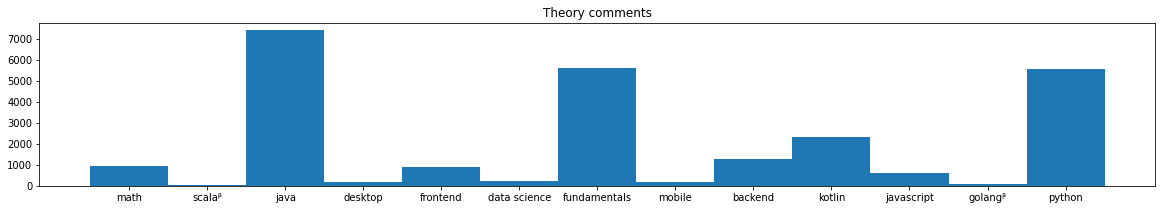

In [18]:
n, bins, patches = plt.hist(common_df_theories.area.values, bins=len(areas))
ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
ticklabels = areas
plt.xticks(ticks, ticklabels)
plt.title('Theory comments')
plt.show()

In [19]:
all_theory_comments = common_df_theories.shape[0]

for area in areas:
    df_area = common_df_theories[common_df_theories.area == area]
    num_comments = df_area.shape[0]
    print(f'{area}: {num_comments} comments, {round(num_comments / all_theory_comments, 2)}%')

math: 950 comments, 0.04%
scalaᵝ: 19 comments, 0.0%
java: 7399 comments, 0.29%
desktop: 185 comments, 0.01%
frontend: 918 comments, 0.04%
data science: 205 comments, 0.01%
fundamentals: 5603 comments, 0.22%
mobile: 160 comments, 0.01%
backend: 1278 comments, 0.05%
kotlin: 2339 comments, 0.09%
javascript: 589 comments, 0.02%
golangᵝ: 102 comments, 0.0%
python: 5564 comments, 0.22%


In [20]:
print(common_df_theories.shape)
common_df_theories = common_df_theories.dropna(subset=['text', 'content_link', 'status'])
print(common_df_theories.shape)

(25311, 13)
(25311, 13)


### Add topic_id to each comment 

In [21]:
import pickle

In [22]:
step_id_topic_id_mapping = pickle.load(open("step_id_topic_id_mapping.pkl", "rb"))

In [23]:
step_ids = []
topic_ids = []
steps_not_in_initial_dump = set()

for row in common_df_theories.iterrows():
    comment_id = row[1].id
    step_id = row[1].content_link.split('/')[-1]
    try:
        topic_id = step_id_topic_id_mapping[int(step_id)]
    except KeyError:
        # we don't have this step in the initial dump
        topic_id = None
        steps_not_in_initial_dump.add(row[1].content_link)
    step_ids.append(step_id)
    topic_ids.append(topic_id)
    
common_df_theories['step_id'] = step_ids
common_df_theories['topic_id'] = topic_ids

In [24]:
for el in steps_not_in_initial_dump:
    print(el)  # some (or all) of them were disabled

https://hyperskill.org/learn/step/7362
https://hyperskill.org/learn/step/4963
https://hyperskill.org/learn/step/5356
https://hyperskill.org/learn/step/6773
https://hyperskill.org/learn/step/17400
https://hyperskill.org/learn/step/3601
https://hyperskill.org/learn/step/8936
https://hyperskill.org/learn/step/5227
https://hyperskill.org/learn/step/19773
https://hyperskill.org/learn/step/9400
https://hyperskill.org/learn/step/5372
https://hyperskill.org/learn/step/19510
https://hyperskill.org/learn/step/3544
https://hyperskill.org/learn/step/19153
https://hyperskill.org/learn/step/13124
https://hyperskill.org/learn/step/7015
https://hyperskill.org/learn/step/4540
https://hyperskill.org/learn/step/19186
https://hyperskill.org/learn/step/3603
https://hyperskill.org/learn/step/9092
https://hyperskill.org/learn/step/6577
https://hyperskill.org/learn/step/6997
https://hyperskill.org/learn/step/5364
https://hyperskill.org/learn/step/12741
https://hyperskill.org/learn/step/19281
https://hyperskil

In [25]:
common_df_theories.head()

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area,step_id,topic_id
28,9403,fixed,comment,"""...to divide between two your friends""\r\nI t...",2019-06-08 20:14:45,https://hyperskill.org/learn/step/5614,text,0,0,0,0,45,math,5614,370.0
29,9408,won't fix,comment,"It was not completely clear for me, how to con...",2019-06-08 20:32:26,https://hyperskill.org/learn/step/5614,text,1,0,3,2,45,math,5614,370.0
48,15054,fixed,feedback,completly not understood,2019-07-09 11:11:43,https://hyperskill.org/learn/step/5753,text,1,0,0,0,105,math,5753,385.0
49,15115,fixed,feedback,A better explanation is needed with clear defi...,2019-07-09 17:34:21,https://hyperskill.org/learn/step/5753,text,1,0,0,0,109,math,5753,385.0
52,15268,fixed,comment,>remember that 2^8 in decimal is 1000 0000 in ...,2019-07-10 16:03:41,https://hyperskill.org/learn/step/5753,text,0,0,1,0,122,math,5753,385.0


In [26]:
common_df_theories.shape[0]  # rows

25311

In [27]:
# now we need to delete rows with empty topic_id values
common_df_theories = common_df_theories.dropna(subset=['topic_id'])

In [28]:
common_df_theories.shape[0]  # 1406 were deleted

23905

In [ ]:
common_df_theories.to_csv(f'{path}/all_comments_to_theories.csv', index=False)

### Lemmatize comments

In [29]:
path = '../other_dumps/comments'

In [30]:
import pandas as pd

In [31]:
all_texts_comments = pd.read_csv(f'{path}/all_comments_to_theories.csv')

In [32]:
import spacy

In [33]:
model = spacy.load('en_core_web_sm')

In [34]:
def spacy_lemmatize(text, model):
    if len(text) > 50000:
        return ''
    doc = model(text)
    lemmas = [str(token.lemma_) for token in doc]
    return ' '.join(lemmas)

In [ ]:
lemmatized = []

for i, row in enumerate(all_texts_comments.iterrows()):
    if i % 500 == 0:
        print(i)
    lemmatized.append(spacy_lemmatize(row[1].text, model))

In [ ]:
all_texts_comments['lemmatized_comments'] = lemmatized

In [ ]:
all_texts_comments.to_csv(f'{path}/all_comments_to_theories.csv', index=False)